# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

#### Mathematical Notations Used:

- **X**: The feature vectors or data points in our dataset.
- **y**: The labels or target values associated with each data point.
- **K**: The number of nearest neighbors to consider (a user-defined hyperparameter).
- **d(x, y)**: A distance metric (e.g., Euclidean distance) to measure the similarity between data points.
- **Class(y)**: The class or label assigned to a data point y.
- **Class(X)**: The predicted class for a data point X using KNN.


#### When and How to Use KNN:

KNN is a non-parametric and lazy-learning algorithm. It is suitable for both classification and regression tasks. You should consider using KNN when:

1. You have labeled data.
2. The data distribution is not highly skewed.
3. You have a reasonably sized dataset since KNN's performance can degrade with large datasets.
4. You want an interpretable model with simple underlying principles.


#### How KNN Works:

1. **Step 1 - Training**: KNN doesn't have a traditional training step like many other algorithms. It simply stores the entire dataset in memory.

2. **Step 2 - Prediction**:
   - For each new data point X for which you want to make a prediction:
   - Calculate the distance (e.g., Euclidean distance) between X and all data points in the training set.
   - Sort the distances and select the K-nearest data points (neighbors).
   - For classification, count the occurrences of each class among the K neighbors and assign the class with the highest count as the predicted class for X.
   - For regression, take the average of the K-nearest neighbors' target values and assign it as the predicted target value for X.



#### Python Code and Explanation:

Let's implement KNN in Python using the scikit-learn library:


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [0, 1, 0, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # K = 3

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%



Explanation of the code:
1. We import necessary libraries.
2. We create a sample dataset with two features (X) and corresponding labels (y).
3. The dataset is split into training and testing sets.
4. We create a KNN classifier with K=3.
5. Fit the model to the training data.
6. Make predictions on the test data.
7. Calculate and print the accuracy of the model.

This is a basic example of using KNN for classification. For regression tasks, you would use `KNeighborsRegressor` instead.

Remember that choosing the right value of K and an appropriate distance metric is crucial for KNN's performance, and these should be tuned based on your specific dataset and problem.

## Import Libraries



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [5]:
df = pd.read_csv("Classified Data")

In [6]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,pred))

[[142  20]
 [ 16 122]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       162
           1       0.86      0.88      0.87       138

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [21]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

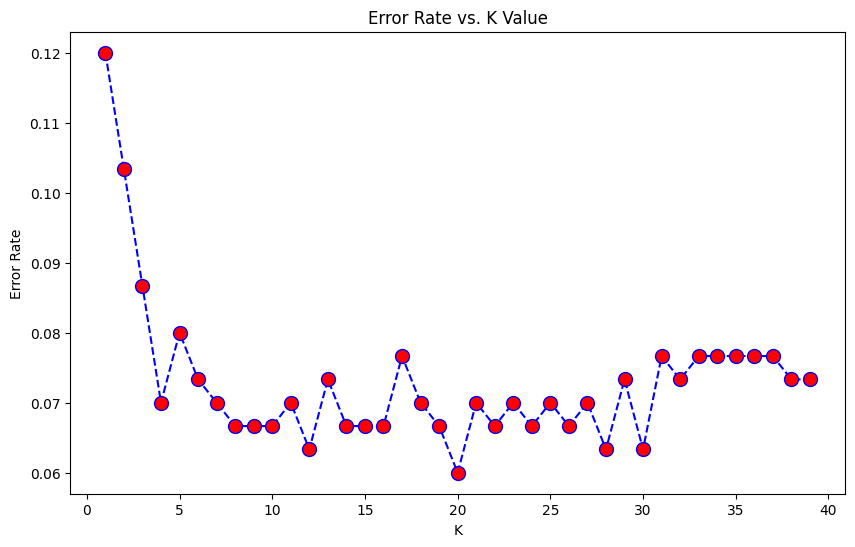

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [23]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[142  20]
 [ 16 122]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       162
           1       0.86      0.88      0.87       138

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [24]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[147  15]
 [  6 132]]


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       162
           1       0.90      0.96      0.93       138

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!